## CMPINF 2100 Fall 2021 - Week 10

### Two inputs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

## Generate data

Examine the behavior of an **additive** model.

$$ \mathrm{trend}_n = \beta_0 + \beta_1 x_{n,1} + \beta_2 x_{n,2} $$

Make a grid of input values.

In [3]:
x1_values = np.linspace(-3, 3, num=11)
x2_values = np.linspace(-3, 3, num=9)

In [4]:
input_grid = pd.DataFrame([ (x1, x2) for x1 in x1_values for x2 in x2_values ],
                          columns=['x1', 'x2'])

In [5]:
input_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      99 non-null     float64
 1   x2      99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


Specify coefficient values.

In [6]:
b0 = -0.25
b1 = 1.95
b2 = 0.2

Calculate the trend for each input combination.

In [7]:
data_df = input_grid.copy()

In [8]:
data_df['trend'] = b0 + b1 * data_df.x1 + b2 * data_df.x2

In [9]:
data_df

,x1,x2,trend
0,-3.0,-3.00,-6.70
1,-3.0,-2.25,-6.55
2,-3.0,-1.50,-6.40
3,-3.0,-0.75,-6.25
4,-3.0,0.00,-6.10
...,...,...,...
94,3.0,0.00,5.60
95,3.0,0.75,5.75
96,3.0,1.50,5.90
97,3.0,2.25,6.05


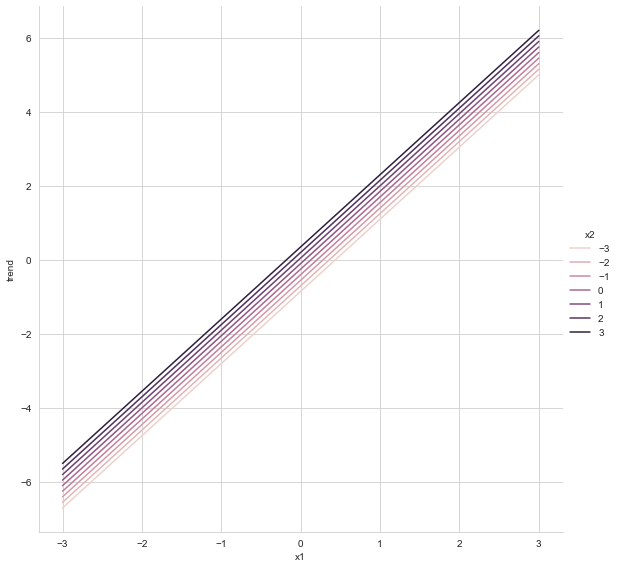

In [12]:
sns.set_style('whitegrid')

sns.relplot(data = data_df, x='x1', y='trend', kind='line', 
            estimator=None, units='x2', hue='x2',
            height=8)

plt.show()

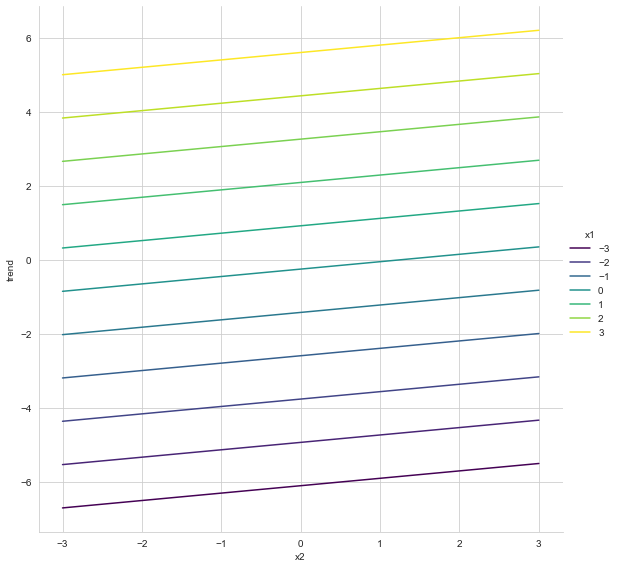

In [13]:
sns.relplot(data = data_df, x='x2', y='trend', kind='line', 
            estimator=None, units='x1', hue='x1', palette='viridis',
            height=8)

plt.show()

What if we want an **interaction** between the two inputs? An interaction for a product or multiplication.

$$ \mathrm{trend}_n = \beta_0 + \beta_1 x_{n,1} + \beta_2 x_{n,2} + \beta_3 x_{n,1} x_{n,2} $$

In [14]:
data_with_int = input_grid.copy()

In [15]:
b3 = 2

In [16]:
data_with_int['trend'] = b0 + b1 * data_with_int.x1 + b2 * data_with_int.x2 + b3 * data_with_int.x1 * data_with_int.x2

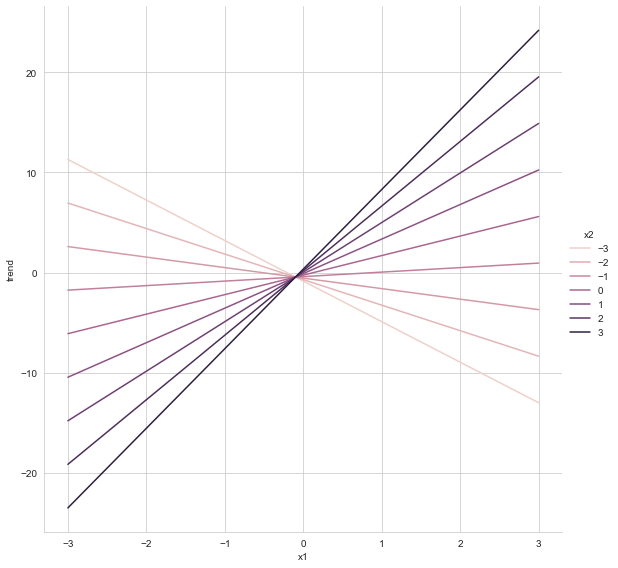

In [17]:
sns.relplot(data = data_with_int, x='x1', y='trend', kind='line', hue='x2',
            estimator=None, units='x2', height=8)

plt.show()

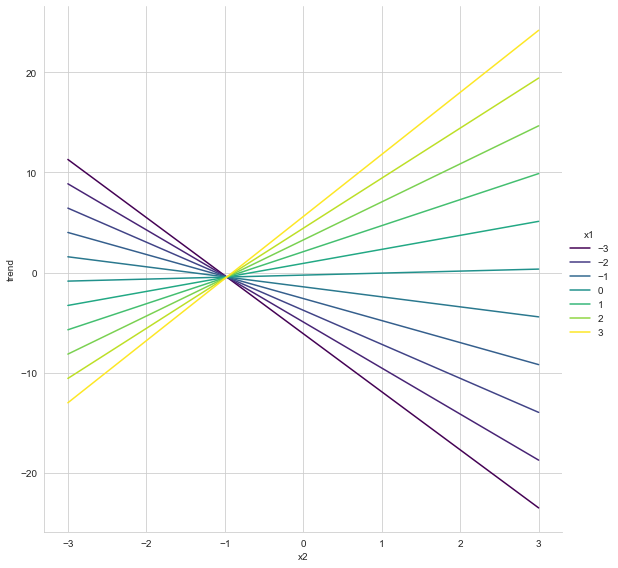

In [18]:
sns.relplot(data = data_with_int, x='x2', y='trend', kind='line', hue='x1',
            estimator=None, units='x1', palette='viridis', height=8)

plt.show()

## Generate fake data

In [19]:
N = 35

rg = np.random.default_rng(2100)

In [20]:
df = pd.DataFrame({'x1': rg.normal(loc=0, scale = 1, size = N),
                   'x2': rg.normal(loc=0, scale = 1, size = N)})

In [21]:
df

,x1,x2
0,1.024252,-0.650623
1,-1.733671,0.993904
2,-0.089294,0.251805
3,-1.093748,1.356543
4,0.320995,-0.145121
5,-1.103206,1.054346
6,-0.775994,-1.629940
7,-0.329677,-0.391626
8,-1.450625,2.538560
9,1.069088,-0.201595


Generate data assuming an additive trend.

In [22]:
df['trend'] = b0 + b1 * df.x1 + b2 * df.x2

In [23]:
my_sigma = 0.85

In [24]:
df['y'] = rg.normal(loc = df.trend, scale = my_sigma, size=df.shape[0])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      35 non-null     float64
 1   x2      35 non-null     float64
 2   trend   35 non-null     float64
 3   y       35 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


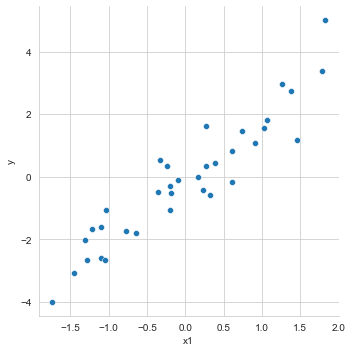

In [26]:
sns.relplot(data = df, x='x1', y='y')

plt.show()

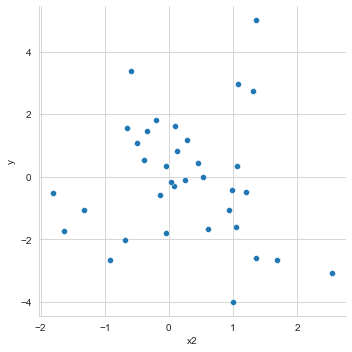

In [27]:
sns.relplot(data = df, x='x2', y='y')

plt.show()

Visualize the best fit line assuming just x1.

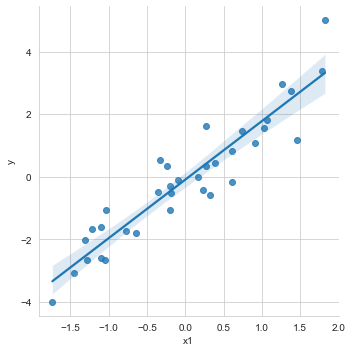

In [28]:
sns.lmplot(data = df, x='x1', y='y') 

plt.show()

Do the same thing for `x2`.

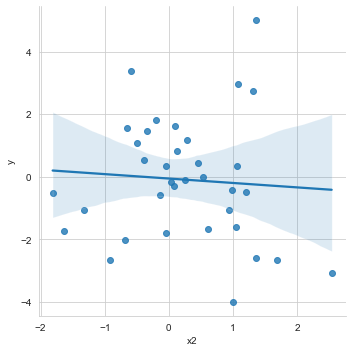

In [30]:
sns.lmplot(data = df, x='x2', y='y')

plt.show()

Fit the linear model with additive terms with statsmodels.

In [31]:
fit_x1x2 = smf.ols(formula='y ~ x1 + x2', data=df).fit()

In [32]:
print( fit_x1x2.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     111.1
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.96e-15
Time:                        20:49:53   Log-Likelihood:                -36.577
No. Observations:                  35   AIC:                             79.15
Df Residuals:                      32   BIC:                             83.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1099      0.126     -0.873      0.3

Visualize the coefficient summaries.

In [33]:
def my_coefplot(model_object, figsize_use=(10,5)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar(y=model_object.params.index, x=model_object.params,
                xerr = 2 * model_object.bse,
                fmt='o', color='k', ecolor='k', elinewidth=3, ms=10)
    
    ax.axvline(x=0, linestyle='--', color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

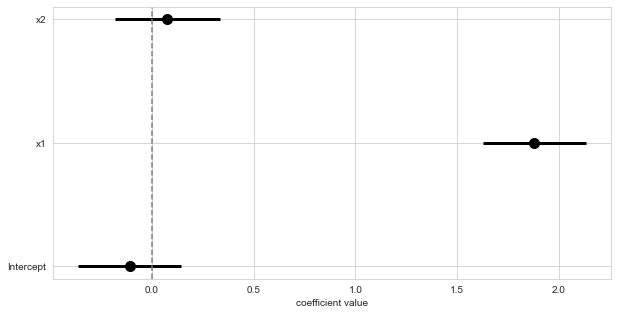

In [34]:
my_coefplot( fit_x1x2 )

In [35]:
fit_x1x2.rsquared

0.8741420863007204

Graphically study the behavior with statsmodels.

In [36]:
import statsmodels.api as sm

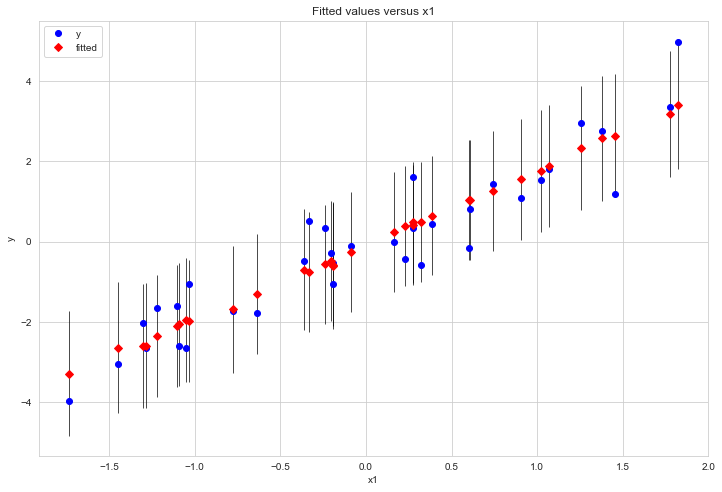

In [37]:
fig, ax = plt.subplots(figsize=(12,8))

sm.graphics.plot_fit(fit_x1x2, 'x1', ax=ax)

plt.show()

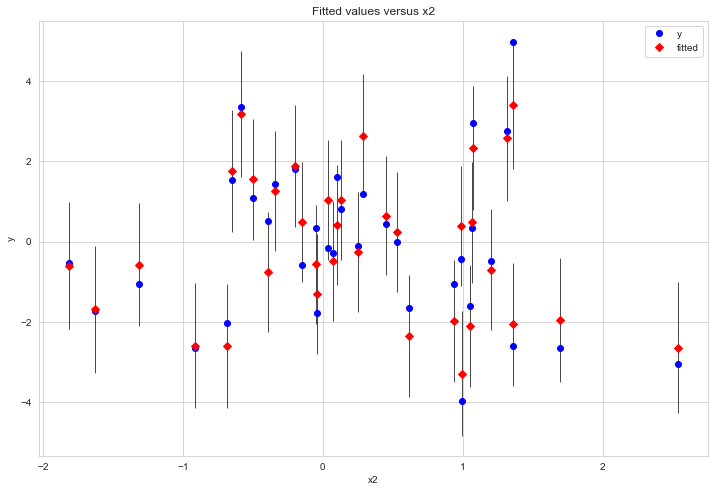

In [38]:
fig, ax = plt.subplots(figsize=(12,8))

sm.graphics.plot_fit(fit_x1x2, 'x2', ax=ax)

plt.show()

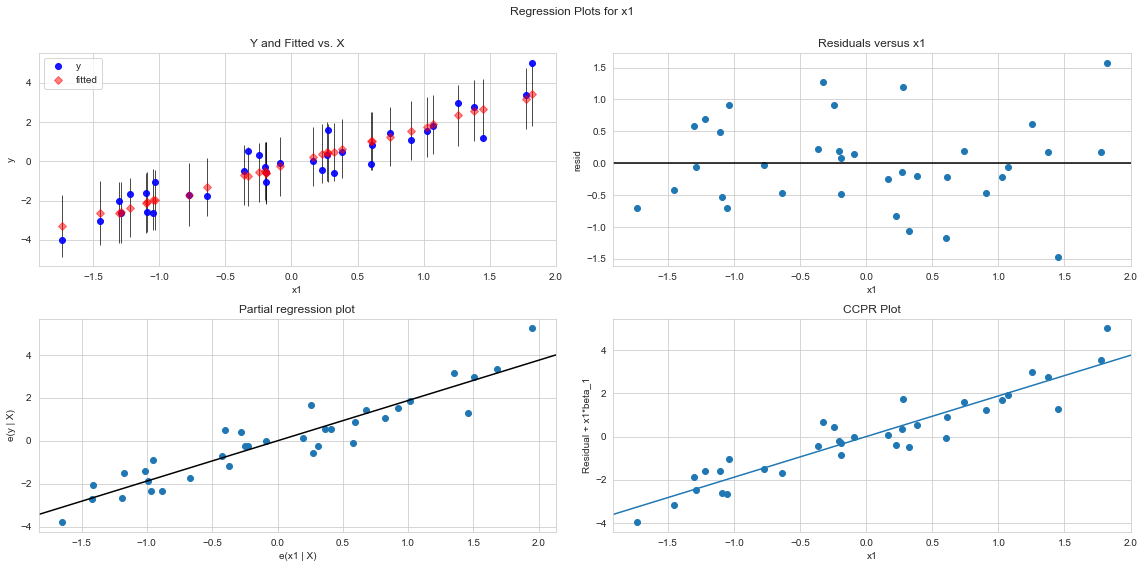

In [39]:
fig = plt.figure(figsize=(16,8))

sm.graphics.plot_regress_exog(fit_x1x2, 'x1', fig=fig)

plt.show()

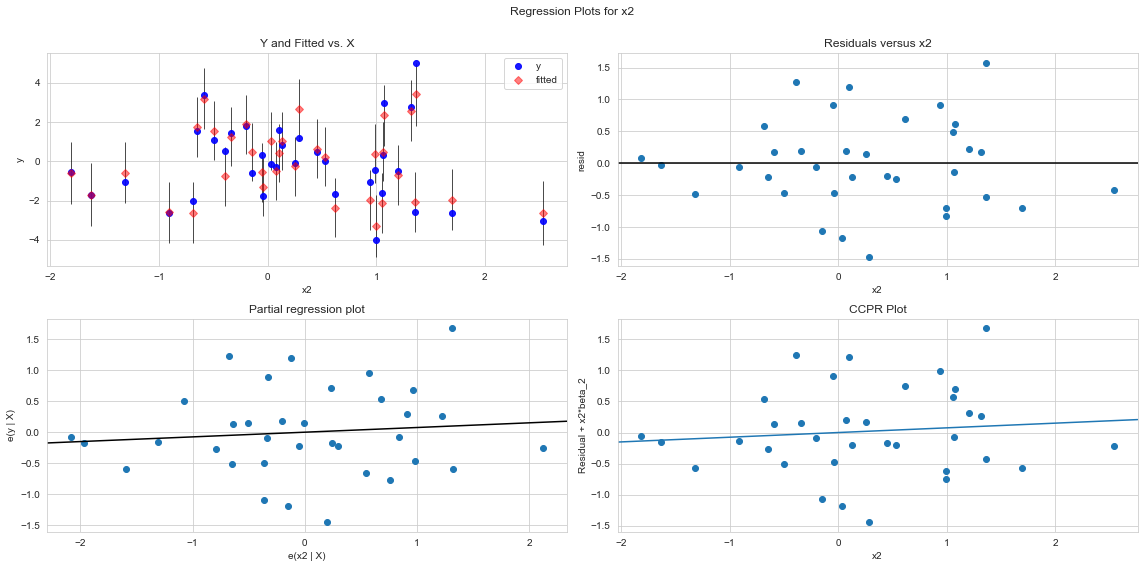

In [40]:
fig = plt.figure(figsize=(16,8))

sm.graphics.plot_regress_exog(fit_x1x2, 'x2', fig=fig)

plt.show()

### fit with interactions

In [41]:
fit_with_int = smf.ols(formula = 'y ~ x1 * x2', data = df).fit()

In [42]:
print( fit_with_int.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     82.92
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           6.69e-15
Time:                        20:57:53   Log-Likelihood:                -34.349
No. Observations:                  35   AIC:                             76.70
Df Residuals:                      31   BIC:                             82.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1073      0.120     -0.894      0.3

In [43]:
smf.ols(formula='y ~ x1 + x2 + x1:x2', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     82.92
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           6.69e-15
Time:                        20:59:16   Log-Likelihood:                -34.349
No. Observations:                  35   AIC:                             76.70
Df Residuals:                      31   BIC:                             82.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1073      0.120     -0.894      0.378      -0.352       0.137
x1             1.7486      0.136     12.823      0.000       1.470       2.027
x2             0.1749      0.132      1.325      0.195      -0.094       0.444
x1:x2          0.2649      0.129      2.052      0.049       0.002       0.528
==============================================================================
Omnibus:                        0.099   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.313
Skew:                           0.036   Prob(JB):                        0.855
Kurtosis:                       2.542   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomials

In [44]:
smf.ols(formula='y~np.power(x1,2) + np.power(x2,2)', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2.920
Date:                Thu, 04 Nov 2021   Prob (F-statistic):             0.0684
Time:                        21:00:06   Log-Likelihood:                -69.914
No. Observations:                  35   AIC:                             145.8
Df Residuals:                      32   BIC:                             150.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0237      0.472      0.050      0.960      -0.938       0.986
np.power(x1, 2)     0.4690      0.342      1.369      0.180      -0.229       1.167
np.power(x2, 2)    -0.5740      0.253     -2.270      0.030      -1.089      -0.059
==============================================================================
Omnibus:                        2.008   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                0.948
Skew:                          -0.184   Prob(JB):                        0.623
Kurtosis:                       3.717   Cond. No.                         3.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interactions of derived features

In [45]:
smf.ols(formula='y~(x1 + np.power(x1,2)) * (x2 + np.power(x2,2))', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     37.79
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           2.15e-12
Time:                        21:01:33   Log-Likelihood:                -28.471
No. Observations:                  35   AIC:                             74.94
Df Residuals:                      26   BIC:                             88.94
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.0484      0.197      0.245      0.808      -0.357       0.454
x1                                  1.3559      0.181      7.504      0.000       0.985       1.727
np.power(x1, 2)                    -0.2880      0.178     -1.618      0.118      -0.654       0.078
x2                                 -0.0303      0.201     -0.151      0.881      -0.443       0.382
np.power(x2, 2)                    -0.0614      0.178     -0.346      0.732      -0.426       0.304
x1:x2                              -0.2297      0.212     -1.085      0.288      -0.665       0.206
x1:np.power(x2, 2)                  0.6419      0.221      2.909      0.007       0.188       1.095
np.power(x1, 2):x2                 -0.2293      0.194     -1.181      0.248      -0.629       0.170
np.power(x1, 2):np.power(x2, 2)     0.4589      0.170      2.696      0.012       0.109       0.809
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.448
Skew:                           0.096   Prob(JB):                        0.799
Kurtosis:                       2.479   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
fit_big = smf.ols(formula='y~(x1 + np.power(x1,2)) * (x2 + np.power(x2,2))', data=df).fit()

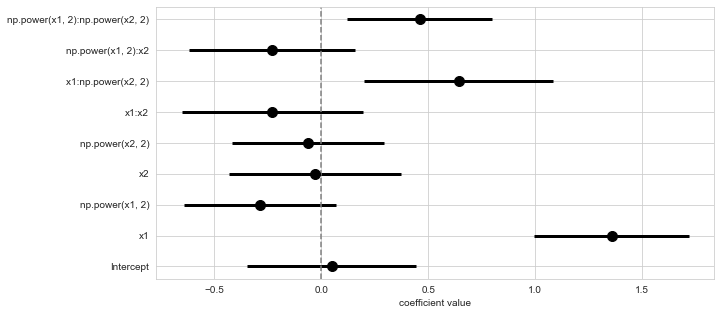

In [47]:
my_coefplot(fit_big)